TASK1 IRIS FLOWER CLASSIFICATION

Iris flower has three species; setosa, versicolor, and virginica, which differs according to their
measurements. Now assume that you have the measurements of the iris flowers according to
their species, and here your task is to train a machine learning model that can learn from the
measurements of the iris species and classify them.



Although the Scikit-learn library provides a dataset for iris flower classification, you can also
download the same dataset from here for the task of iris flower classification with Machine
Learning.

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
from google.colab import files
uploded=files.upload()

Saving iris.csv to iris (1).csv


In [ ]:
data=pd.read_csv("iris.csv")
data

,SepalLength,SepalWidth,PetalLength,PetalWidth,Name
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica


In [ ]:
data.isnull().sum()

SepalLength    0
SepalWidth     0
PetalLength    0
PetalWidth     0
Name           0
dtype: int64

In [ ]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
data['Name']=le.fit_transform(data['Name'])
data.rename(columns={'Name': 'Species'}, inplace=True)

In [ ]:
data

,SepalLength,SepalWidth,PetalLength,PetalWidth,Species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2
146,6.3,2.5,5.0,1.9,2
147,6.5,3.0,5.2,2.0,2
148,6.2,3.4,5.4,2.3,2


In [ ]:
data["Species"].unique()

array([0, 1, 2])

In [ ]:
data.describe()

,SepalLength,SepalWidth,PetalLength,PetalWidth,Species
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667,1.000000
std,0.828066,0.433594,1.764420,0.763161,0.819232
min,4.300000,2.000000,1.000000,0.100000,0.000000
25%,5.100000,2.800000,1.600000,0.300000,0.000000
50%,5.800000,3.000000,4.350000,1.300000,1.000000
75%,6.400000,3.300000,5.100000,1.800000,2.000000
max,7.900000,4.400000,6.900000,2.500000,2.000000


In [ ]:
data.shape

(150, 5)

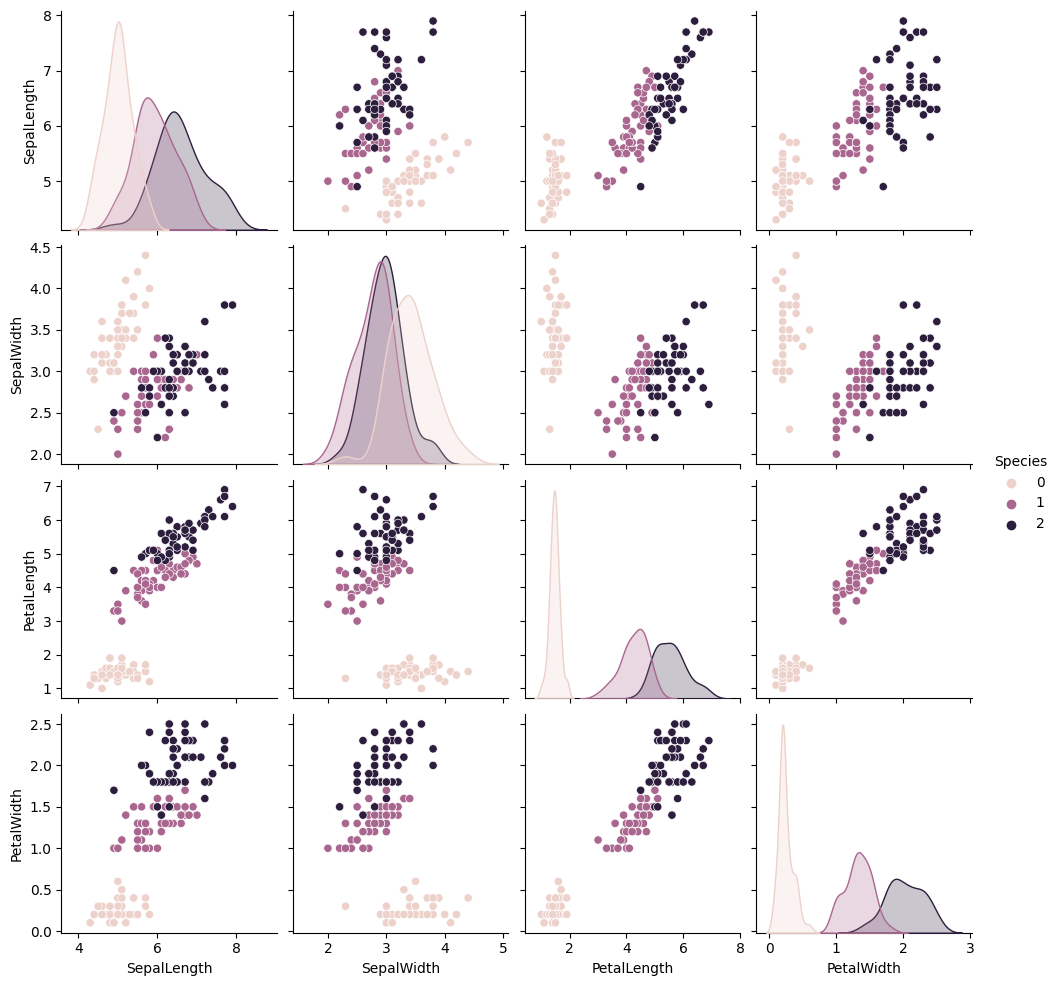

In [ ]:
sns.pairplot(data, hue="Species")

<Axes: >

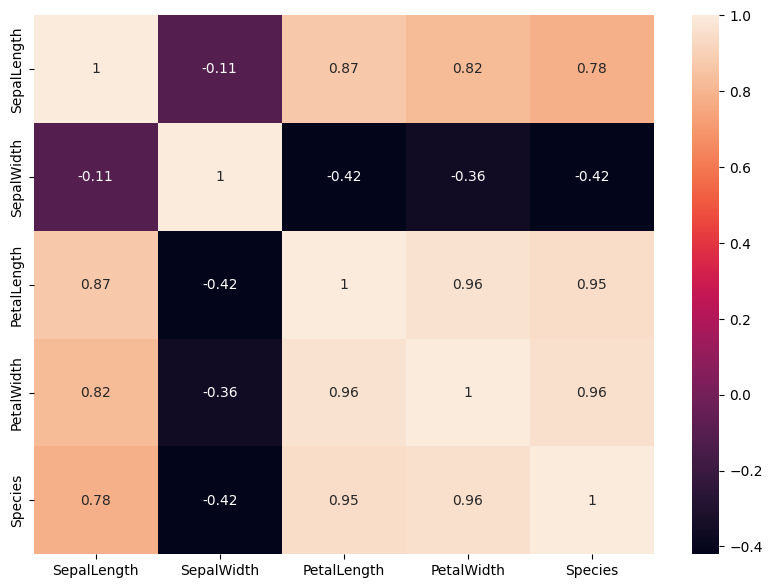

In [ ]:
plt.figure(figsize=(10,7))
sns.heatmap(data.corr(),annot=True)

<Axes: xlabel='PetalLength', ylabel='PetalWidth'>

<Figure size 600x300 with 0 Axes>

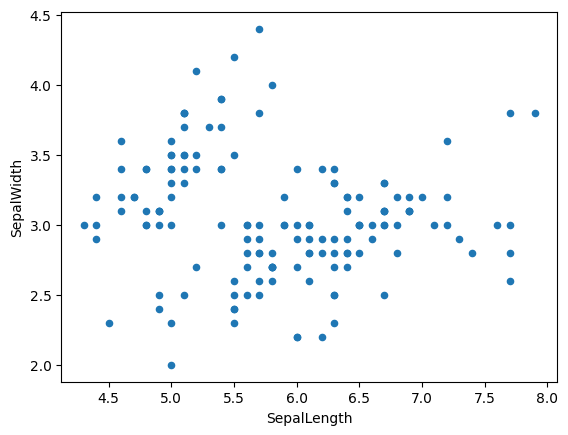

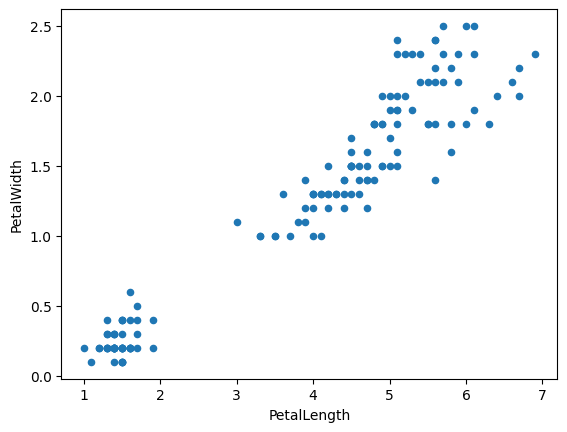

In [ ]:
plt.figure(figsize=(6,3))
data.plot(kind='scatter',x='SepalLength',y='SepalWidth')
data.plot(kind='scatter',x='PetalLength',y='PetalWidth')

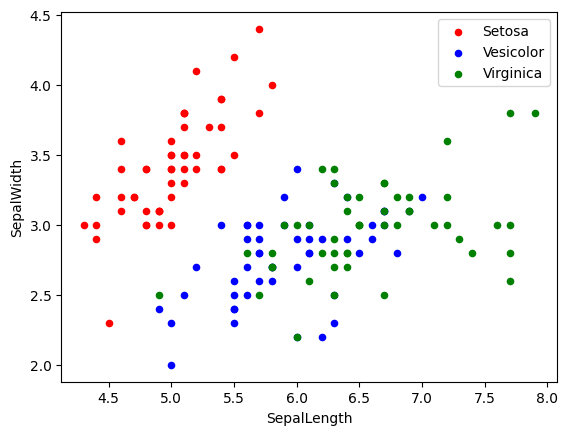

In [ ]:
fig=data[data.Species==0].plot(kind='scatter',x='SepalLength',y='SepalWidth',color='red',label='Setosa')
fig=data[data.Species==1].plot(kind='scatter',x='SepalLength',y='SepalWidth',color='blue',label='Vesicolor',ax=fig)
fig=data[data.Species==2].plot(kind='scatter',x='SepalLength',y='SepalWidth',color='green',label='Virginica',ax=fig)

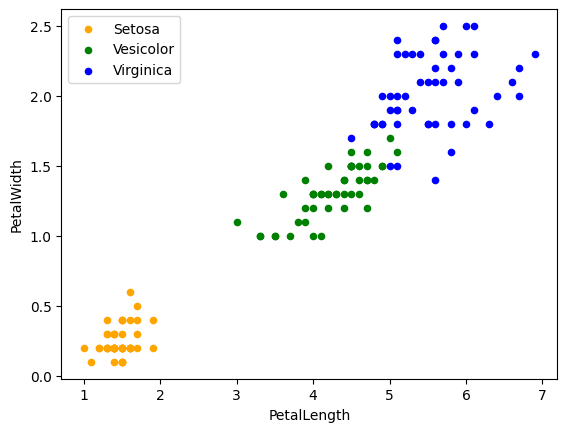

In [ ]:
fig=data[data.Species==0].plot(kind='scatter',x='PetalLength',y='PetalWidth',color='orange',label='Setosa')
fig=data[data.Species==1].plot(kind='scatter',x='PetalLength',y='PetalWidth',color='green',label='Vesicolor',ax=fig)
fig=data[data.Species==2].plot(kind='scatter',x='PetalLength',y='PetalWidth',color='blue',label='Virginica',ax=fig)

<Axes: xlabel='Species', ylabel='SepalLength'>

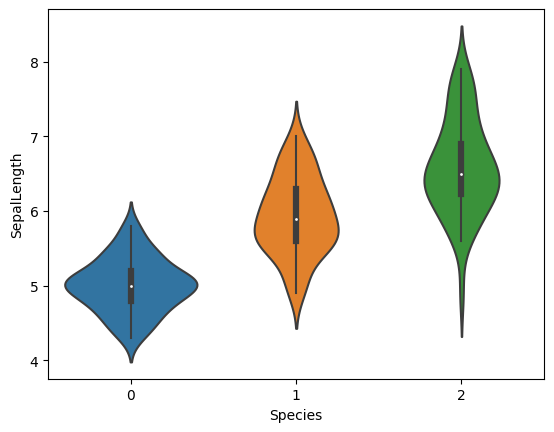

In [ ]:
#creating vilone plot
sns.violinplot(x='Species', y='SepalLength', data=data)

<Axes: xlabel='Species', ylabel='PetalWidth'>

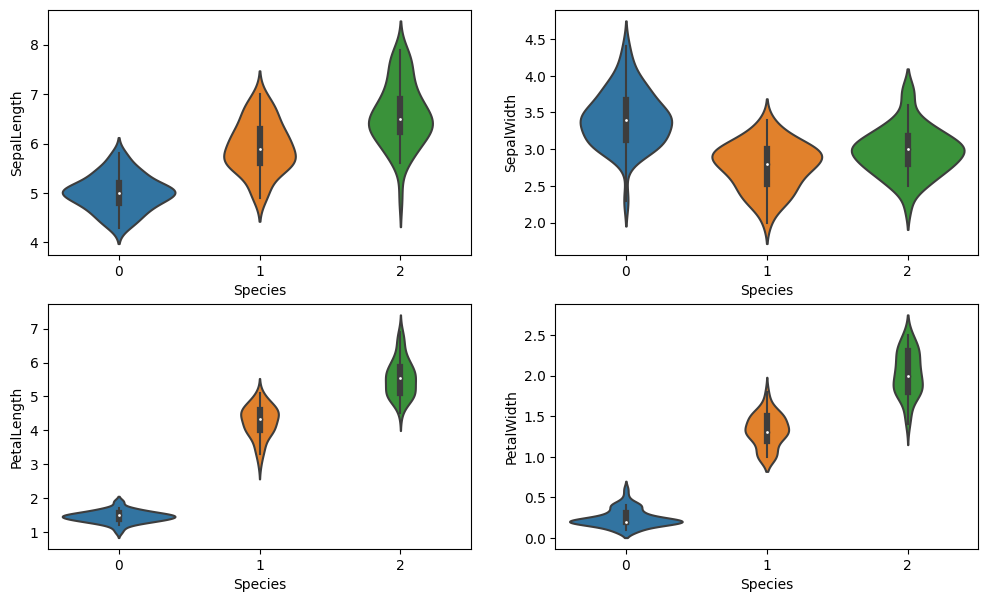

In [ ]:
plt.figure(figsize=(12,7))
plt.subplot(2,2,1)
sns.violinplot(x='Species', y='SepalLength', data=data)
plt.subplot(2,2,2)
sns.violinplot(x='Species', y='SepalWidth', data=data)
plt.subplot(2,2,3)
sns.violinplot(x='Species', y='PetalLength', data=data)
plt.subplot(2,2,4)
sns.violinplot(x='Species', y='PetalWidth', data=data)

Model Building and testing

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier,plot_tree
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score,confusion_matrix,classification_report

In [ ]:
X=data.drop('Species',axis=1)
Y=data['Species']

In [ ]:
x_train,x_test,y_train,y_test=train_test_split(X,Y,test_size=0.2,random_state=42)

In [ ]:
print("x_train:",x_train.shape)
print("x_test:",x_test.shape)
print("y_train:",y_train.shape)
print("y_test:",y_test.shape)

x_train: (120, 4)
x_test: (30, 4)
y_train: (120,)
y_test: (30,)


In [ ]:
descion_tree=DecisionTreeClassifier()
descion_tree.fit(x_train,y_train)
prediction=descion_tree.predict(x_test)
print('Accuracy score: {}'.format(accuracy_score(y_test, prediction)))
print('Precision score: {}'.format(precision_score(y_test, prediction, average='micro')))
print('Recall score: {}'.format(recall_score(y_test, prediction, average='micro')))
print('F1 score: {}'.format(f1_score(y_test, prediction, average='micro')))



Accuracy score: 1.0
Precision score: 1.0
Recall score: 1.0
F1 score: 1.0


In [ ]:
print(classification_report(y_test,prediction))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       1.00      1.00      1.00         9
           2       1.00      1.00      1.00        11

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30



In [ ]:
print('confusion matrix:{}'. format(confusion_matrix(y_test,prediction)))

confusion matrix:[[10  0  0]
 [ 0  9  0]
 [ 0  0 11]]


<Axes: >

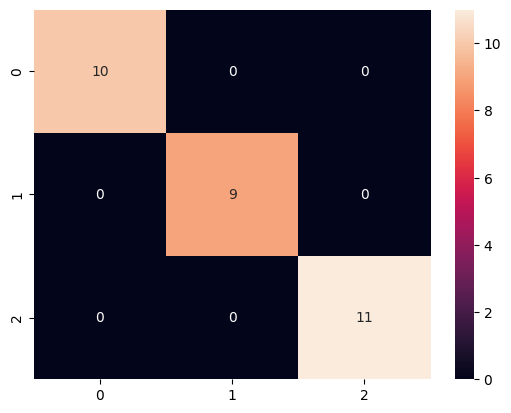

In [ ]:
sns.heatmap(confusion_matrix(y_test, prediction), annot=True, fmt='d')

[Text(0.3076923076923077, 0.9285714285714286, 'PetalLength <= 2.45\ngini = 0.667\nsamples = 120\nvalue = [40, 41, 39]\nclass = Versicolor'),
 Text(0.23076923076923078, 0.7857142857142857, 'gini = 0.0\nsamples = 40\nvalue = [40, 0, 0]\nclass = Setosa'),
 Text(0.38461538461538464, 0.7857142857142857, 'PetalLength <= 4.75\ngini = 0.5\nsamples = 80\nvalue = [0, 41, 39]\nclass = Versicolor'),
 Text(0.15384615384615385, 0.6428571428571429, 'PetalWidth <= 1.65\ngini = 0.053\nsamples = 37\nvalue = [0, 36, 1]\nclass = Versicolor'),
 Text(0.07692307692307693, 0.5, 'gini = 0.0\nsamples = 36\nvalue = [0, 36, 0]\nclass = Versicolor'),
 Text(0.23076923076923078, 0.5, 'gini = 0.0\nsamples = 1\nvalue = [0, 0, 1]\nclass = Virginica'),
 Text(0.6153846153846154, 0.6428571428571429, 'PetalWidth <= 1.75\ngini = 0.206\nsamples = 43\nvalue = [0, 5, 38]\nclass = Virginica'),
 Text(0.38461538461538464, 0.5, 'PetalLength <= 4.95\ngini = 0.5\nsamples = 8\nvalue = [0, 4, 4]\nclass = Versicolor'),
 Text(0.30769230

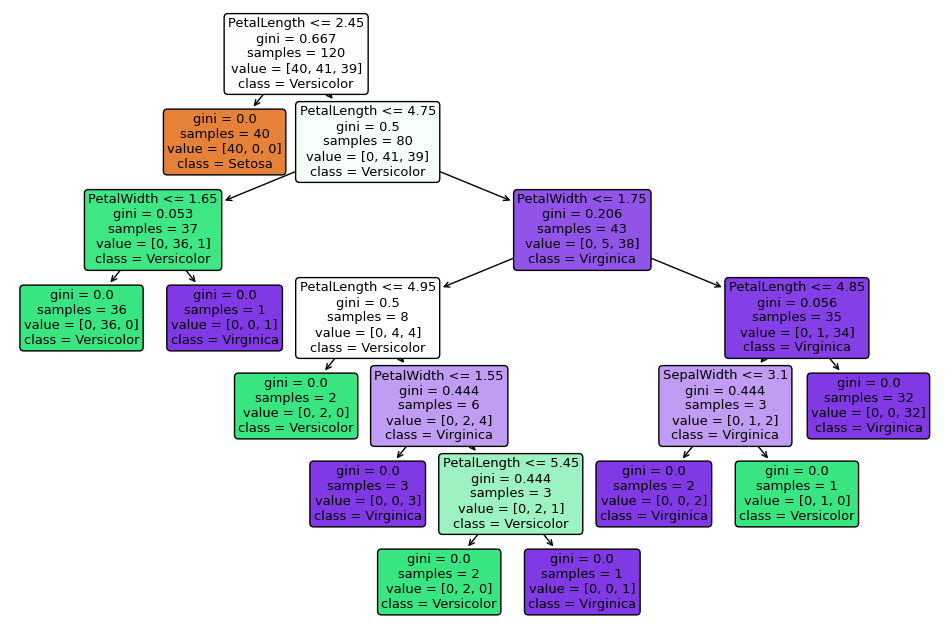

In [ ]:
#ploting decision tree
plt.figure(figsize=(12,8))
plot_tree(descion_tree, filled=True, feature_names=['SepalLength', 'SepalWidth', 'PetalLength', 'PetalWidth'], class_names=['Setosa', 'Versicolor', 'Virginica'], rounded=True)

In [ ]:
knn=KNeighborsClassifier(n_neighbors=2)
knn.fit(x_train,y_train)

KNeighborsClassifier(n_neighbors=2)

In [ ]:
predict=knn.predict(x_test)
print('Accuracy score: {}'.format(accuracy_score(y_test, predict)))
print('Precision score: {}'.format(precision_score(y_test, predict,average='micro')))
print('Recall score: {}'.format(recall_score(y_test, predict,average='micro')))
print('F1 score: {}'.format(f1_score(y_test, predict,average='micro')))

Accuracy score: 1.0
Precision score: 1.0
Recall score: 1.0
F1 score: 1.0


In [ ]:
print(classification_report(y_test,predict))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       1.00      1.00      1.00         9
           2       1.00      1.00      1.00        11

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30



In [ ]:
print('confusion matrix:{}'. format(confusion_matrix(y_test,predict)))

confusion matrix:[[10  0  0]
 [ 0  9  0]
 [ 0  0 11]]


<Axes: >

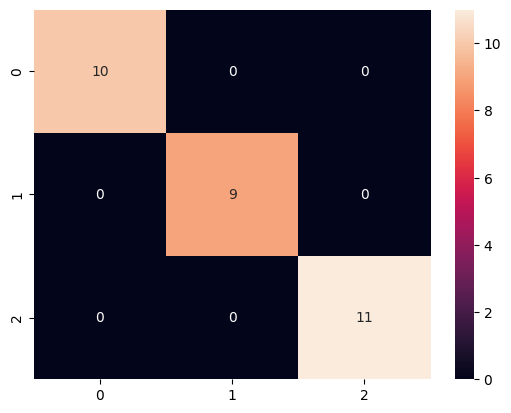

In [ ]:
sns.heatmap(confusion_matrix(y_test, predict), annot=True, fmt='d')